# Importing libraries & Loading data

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('data/fertilizer_dataset.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


# Understading the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [4]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [5]:
#checking unique values
data.nunique()

Temparature    21
Humidity       34
Moisture       41
Soil_Type       5
Crop_Type      17
Nitrogen       47
Potassium      31
Phosphorous    36
Fertilizer     14
dtype: int64

In [6]:
data.shape

(552, 9)

In [7]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [8]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [9]:
data['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [10]:
data['Soil_Type'].unique()

array(['Clayey', 'Loamy', 'Red', 'Black', 'Sandy'], dtype=object)

In [11]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,552.000000,552.000000,552.000000,552,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,64,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,NaN,37.000000,18.000000,36.000000,NaN


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,552.0,28.630435,5.088082,0.0,26.0,29.0,32.0,38.0
Humidity,552.0,64.557971,11.880236,50.0,54.0,62.0,68.0,95.0
Moisture,552.0,42.840580,11.507275,25.0,33.0,41.0,51.0,65.0
Nitrogen,552.0,28.521739,29.121989,0.0,10.0,15.0,37.0,126.0
Potassium,552.0,10.144928,13.456956,0.0,0.0,0.0,18.0,59.0
Phosphorous,552.0,21.115942,14.920514,0.0,8.0,20.0,36.0,54.0


# Data visualization

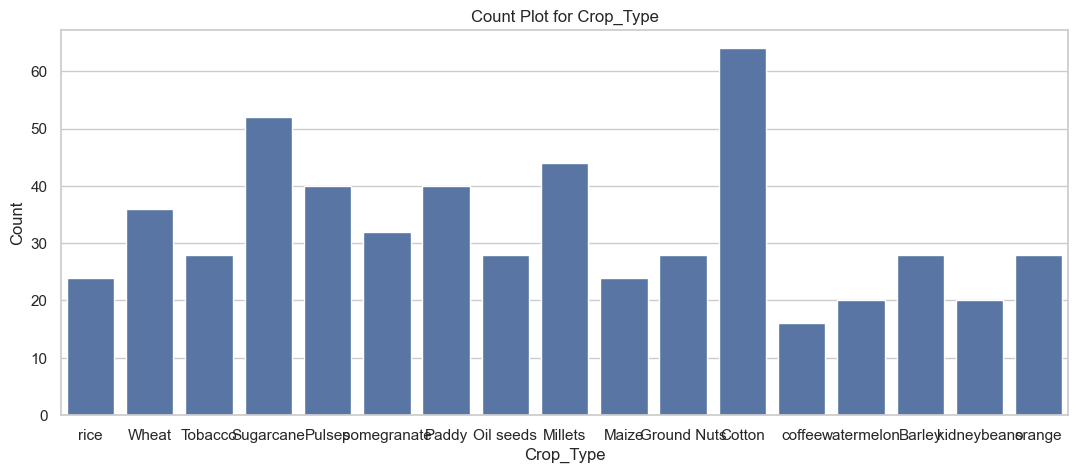

In [13]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

The plot that shows the count (frequency) of each unique crop type in the dataset
The x-axis represents the different crop types.
The y-axis represents the count (the number of occurrences) of each crop type in the dataset

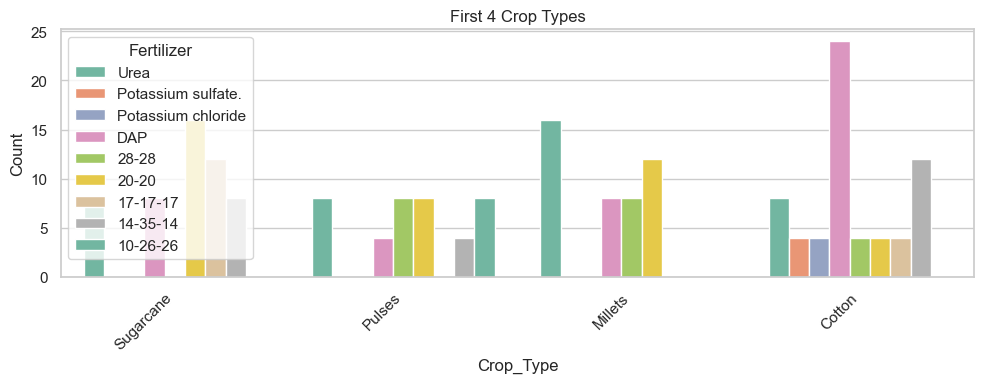

In [14]:
#first 4 crop types
part1_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

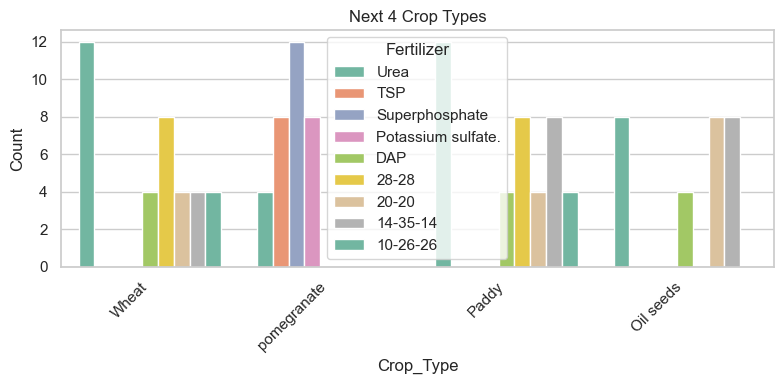

In [15]:
# Split the data into three parts: next 4 crop types
part2_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

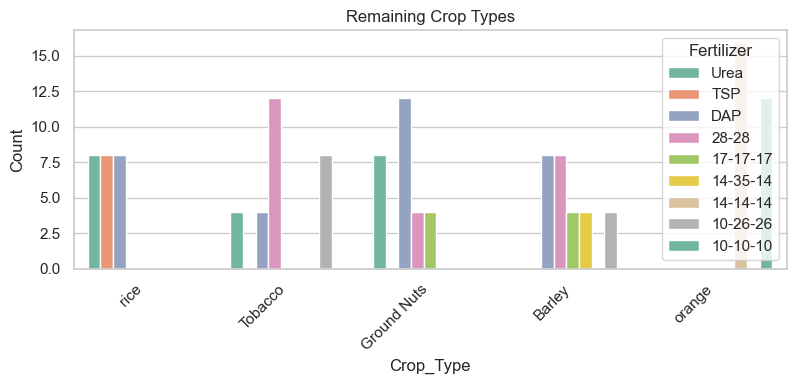

In [16]:
# Split the data into three parts: remaining crop types
part3_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

 this plot is provides insights into how different crop types are distributed based on the type of fertilizer used.
The x-axis represents the different crop types.
The y-axis represents the count (the number of occurrences) of each crop type in the dataset.

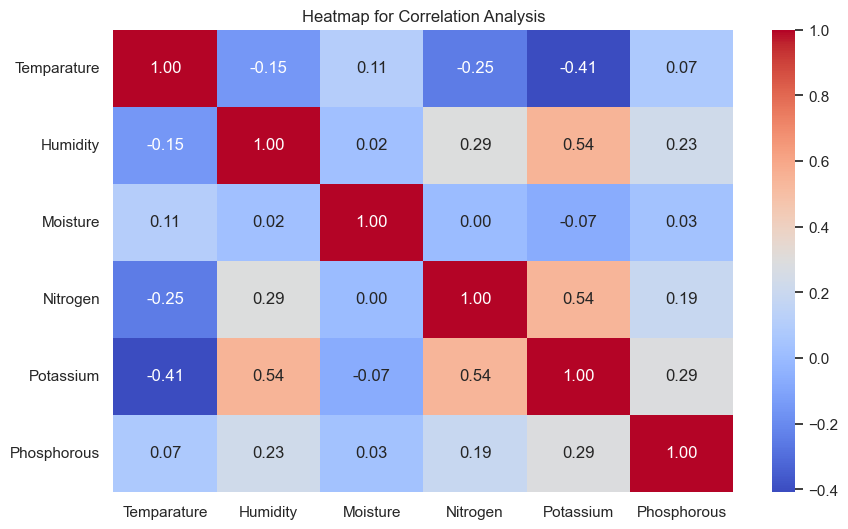

In [17]:
#Heatmap for Correlation Analysis
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation and plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap for Correlation Analysis")
plt.show()

# Encoding the labels for categorical variables

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [20]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [21]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [22]:
data

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,1,15,90,49,36,13
1,25,84,32,2,15,66,59,36,13
2,33,64,50,2,10,41,0,0,13
3,34,65,54,2,10,38,0,0,13
4,38,72,51,2,10,39,0,0,13
...,...,...,...,...,...,...,...,...,...
547,12,95,42,4,13,11,14,5,0
548,12,95,42,4,13,11,14,5,0
549,27,80,31,1,12,19,21,6,0
550,27,80,31,1,12,19,21,6,0


# Splitting the data into train and test

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (441, 8), y_train = (441,), x_test = (111, 8), y_test = (111,)


here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training
x_train and x_test = contain the features (independent variables) used for training and testing the model
y_train and y_test = contains the labels(dependent variable) used for training and testing the model.

In [24]:
x_train

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
213,26,53,28,2,11,85,33,25
92,26,52,32,0,5,12,0,8
66,30,60,47,4,0,12,0,42
314,25,78,40,2,1,102,37,25
119,34,65,62,0,1,7,9,30
...,...,...,...,...,...,...,...,...
129,30,60,27,3,9,4,17,17
144,33,64,50,2,10,41,0,0
72,26,52,39,1,7,21,0,23
235,30,89,30,2,14,5,21,38


In [25]:
y_train

213    13
92      6
66      8
314     8
119     3
       ..
129     1
144    13
72      7
235    12
37     10
Name: Fertilizer, Length: 441, dtype: int64

In [26]:
x_test

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
364,29,58,43,1,6,24,0,18
247,27,85,37,2,14,21,21,38
65,35,67,42,4,0,10,0,35
237,26,82,27,2,15,73,48,36
547,12,95,42,4,13,11,14,5
...,...,...,...,...,...,...,...,...
392,30,60,49,2,10,13,0,9
417,36,68,33,0,5,13,0,14
17,28,54,35,0,4,41,0,0
370,27,53,43,0,4,23,0,24


In [27]:
y_test

364     7
247    11
65      8
237    12
547     0
       ..
392     6
417     6
17     13
370     7
475     3
Name: Fertilizer, Length: 111, dtype: int64

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 213 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  441 non-null    int64
 1   Humidity     441 non-null    int64
 2   Moisture     441 non-null    int64
 3   Soil_Type    441 non-null    int64
 4   Crop_Type    441 non-null    int64
 5   Nitrogen     441 non-null    int64
 6   Potassium    441 non-null    int64
 7   Phosphorous  441 non-null    int64
dtypes: int64(8)
memory usage: 31.0 KB


In [29]:
acc = [] # TEST
model = []
acc1=[] # TRIAN

# Training the model 

## Logistic regression model

In [30]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

ds = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
ds.fit(x_train,y_train)

# Predict on test data
predicted_test = ds.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_test)
acc.append(x)

# Predict on train data
predicted_train = ds.predict(x_train)
y = metrics.accuracy_score(y_train, predicted_train)
acc1.append(y)

# Print Accuracy
print("Decision Tree's Accuracy: Train =", y * 100, "% Test =", x * 100, "%")

# Use correct predictions for classification report
print(classification_report(y_test, predicted_test))  # Use test set predictions here


Decision Tree's Accuracy: Train = 93.42403628117914 % Test = 90.09009009009009 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.92      0.75      0.83        16
           9       0.00      0.00      0.00         1
          10       0.33      1.00      0.50         2
          11       0.00      0.00      0.00         3
          12       0.64      1.00      0.78         7
          13       1.00      0.94      0.97        18

    accuracy                           0.90       111
   macro avg       0.75      0.82      0.77       111

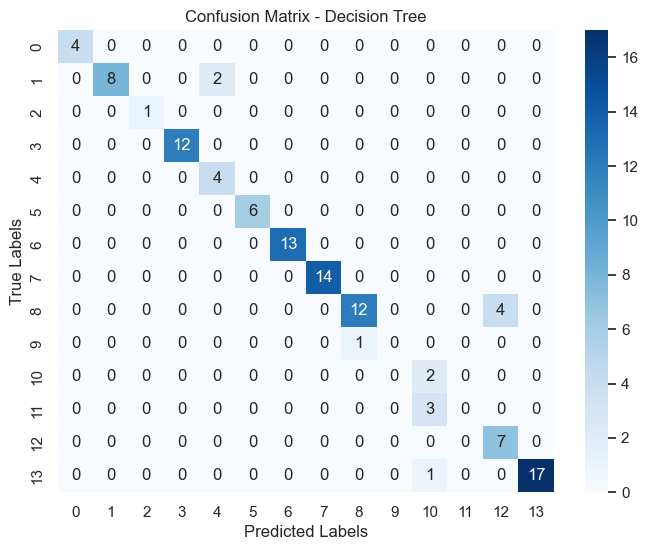

In [31]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

## Naive Bayes Model

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train, y_train)

# Predict on test set
predicted_test = NaiveBayes.predict(x_test)
x = accuracy_score(y_test, predicted_test)
acc.append(x)

# Predict on train set
predicted_train = NaiveBayes.predict(x_train)
y = accuracy_score(y_train, predicted_train)
acc1.append(y)

model.append('Naive Bayes')

print("Naive Bayes's Accuracy is: Train =", y * 100, "% Test =", x * 100, "%")

# Use test predictions for the classification report
print(classification_report(y_test, predicted_test))  

Naive Bayes's Accuracy is: Train = 91.38321995464852 % Test = 94.5945945945946 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.88      0.88      0.88        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.60      1.00      0.75         3
          12       0.75      0.86      0.80         7
          13       1.00      0.83      0.91        18

    accuracy                           0.95       111
   macro avg       0.94      0.97      0.95       111

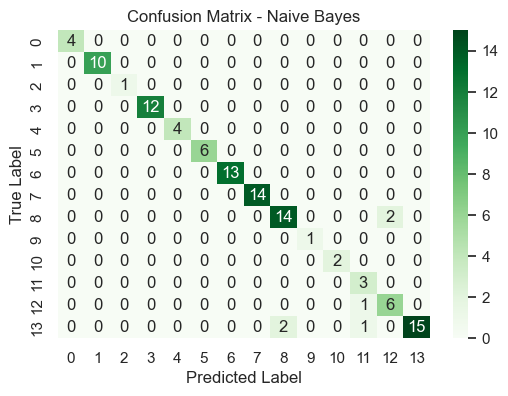

In [33]:
# Compute confusion matrix
cm_nb = confusion_matrix(y_test, predicted_test)

# Plot Confusion Matrix
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', xticklabels=NaiveBayes.classes_, yticklabels=NaiveBayes.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


## Support Vector Machine Model

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# Normalize data using MinMaxScaler
norm = MinMaxScaler().fit(x_train)  # Fit only on training data
X_train_norm = norm.transform(x_train)  # Transform training data
X_test_norm = norm.transform(x_test)  # Transform test data

# Initialize and train SVM
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm, y_train)

# Predict on test set
predicted_test = SVM.predict(X_test_norm)
x = accuracy_score(y_test, predicted_test)
acc.append(x)

# Predict on train set
predicted_train = SVM.predict(X_train_norm)
y = accuracy_score(y_train, predicted_train)
acc1.append(y)

model.append('SVM')

print("SVM's Accuracy is: Train =", y * 100, "% Test =", x * 100, "%")

# Use test predictions for classification report
print(classification_report(y_test, predicted_test))


SVM's Accuracy is: Train = 99.31972789115646 % Test = 99.09909909909909 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         7
          13       1.00      0.94      0.97        18

    accuracy                           0.99       111
   macro avg       0.98      1.00      0.99       111
weight

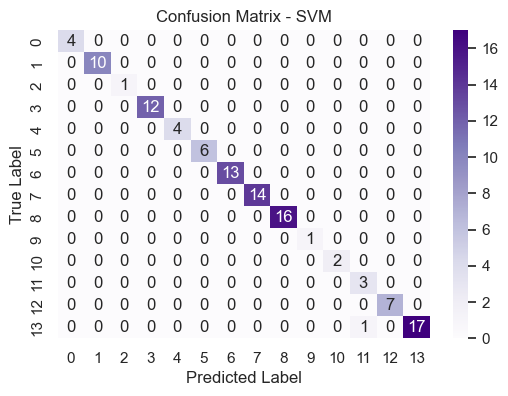

In [35]:
# Compute confusion matrix
cm_svm = confusion_matrix(y_test, predicted_test)

# Plot Confusion Matrix
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=SVM.classes_, yticklabels=SVM.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


## Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression model
LogReg = LogisticRegression(random_state=2)

# Train the model
LogReg.fit(x_train, y_train)

# Predict on test set
predicted_test = LogReg.predict(x_test)
x = accuracy_score(y_test, predicted_test)
acc.append(x)

# Predict on train set
predicted_train = LogReg.predict(x_train)
y = accuracy_score(y_train, predicted_train)
acc1.append(y)

model.append('Logistic Regression')

print("Logistic Regression's Accuracy is: Train =", y * 100, "% Test =", x * 100, "%")

# Use test predictions for classification report
print(classification_report(y_test, predicted_test))


Logistic Regression's Accuracy is: Train = 90.9297052154195 % Test = 78.37837837837837 %
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00        10
           2       0.33      1.00      0.50         1
           3       0.90      0.75      0.82        12
           4       1.00      0.25      0.40         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.58      0.69      0.63        16
           9       0.00      0.00      0.00         1
          10       1.00      0.50      0.67         2
          11       0.50      0.33      0.40         3
          12       0.25      0.29      0.27         7
          13       0.73      0.89      0.80        18

    accuracy                           0.78       111
   macro avg       0.73      0.66      0.65  

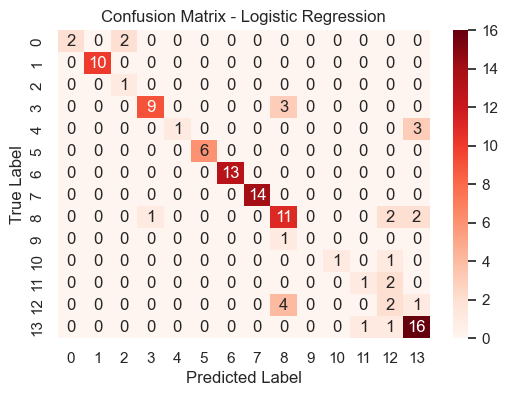

In [37]:
# Compute confusion matrix
cm_logreg = confusion_matrix(y_test, predicted_test)

# Plot Confusion Matrix
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Reds', xticklabels=LogReg.classes_, yticklabels=LogReg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## Random Forest Model

In [38]:
 x_train

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
213,26,53,28,2,11,85,33,25
92,26,52,32,0,5,12,0,8
66,30,60,47,4,0,12,0,42
314,25,78,40,2,1,102,37,25
119,34,65,62,0,1,7,9,30
...,...,...,...,...,...,...,...,...
129,30,60,27,3,9,4,17,17
144,33,64,50,2,10,41,0,0
72,26,52,39,1,7,21,0,23
235,30,89,30,2,14,5,21,38


In [39]:
print("Columns in x_train before training:", x_train.columns)

Columns in x_train before training: Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')


In [40]:
print("Columns used in training:", x_train.columns)

Columns used in training: Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')


In [41]:
print("Shape of x_train:", x_train.shape)

Shape of x_train: (441, 8)


In [42]:
import pandas as pd

print(type(x_train))  # Should print <class 'pandas.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [43]:
x_train = pd.DataFrame(x_train, columns=['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type', 'Nitrogen', 'Potassium', 'Phosphorous'])

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Initialize Random Forest Classifier
RF = RandomForestClassifier(n_estimators=20, random_state=0)

# Train the model
RF.fit(x_train, y_train)

# Predict on test set
predicted_test = RF.predict(x_test)
x = accuracy_score(y_test, predicted_test)
acc.append(x)

# Predict on train set
predicted_train = RF.predict(x_train)
y = accuracy_score(y_train, predicted_train)
acc1.append(y)

model.append('Random Forest')

print("Random Forest's Accuracy is: Train =", y * 100, "% Test =", x * 100, "%")

# Use test predictions for classification report
print(classification_report(y_test, predicted_test))


Random Forest's Accuracy is: Train = 100.0 % Test = 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        18

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1

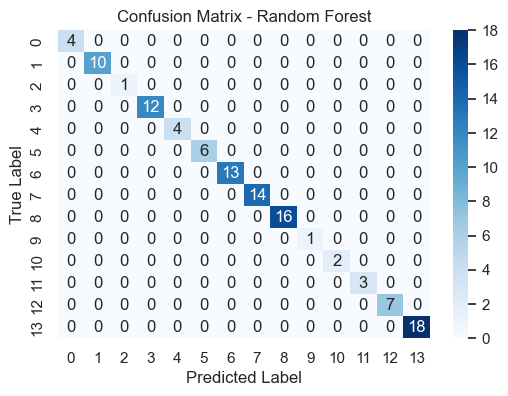

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, predicted_test)

# Plot Confusion Matrix
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=RF.classes_, yticklabels=RF.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### ROC Curve for Random Forest

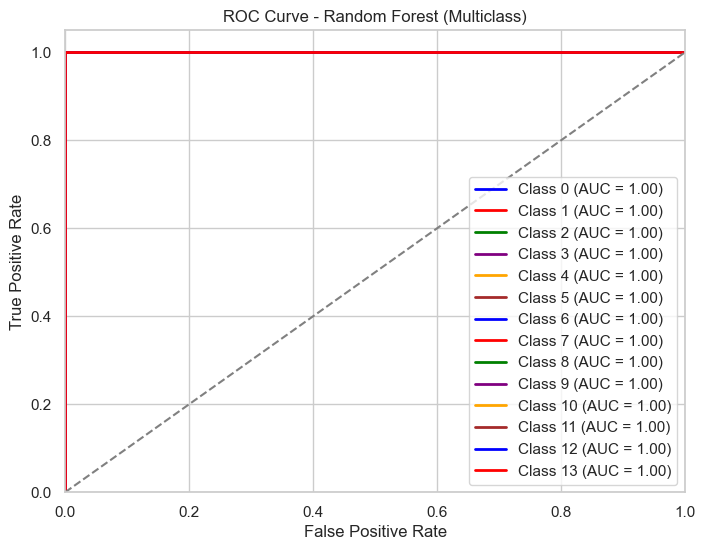

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize y_test for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))  
n_classes = y_test_binarized.shape[1]  

# Get the predicted probabilities for all classes
y_probs = RF.predict_proba(x_test)  

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6), dpi=100)
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multiclass)')
plt.legend(loc='lower right')
plt.show()


### Code to Visualize Feature Importance

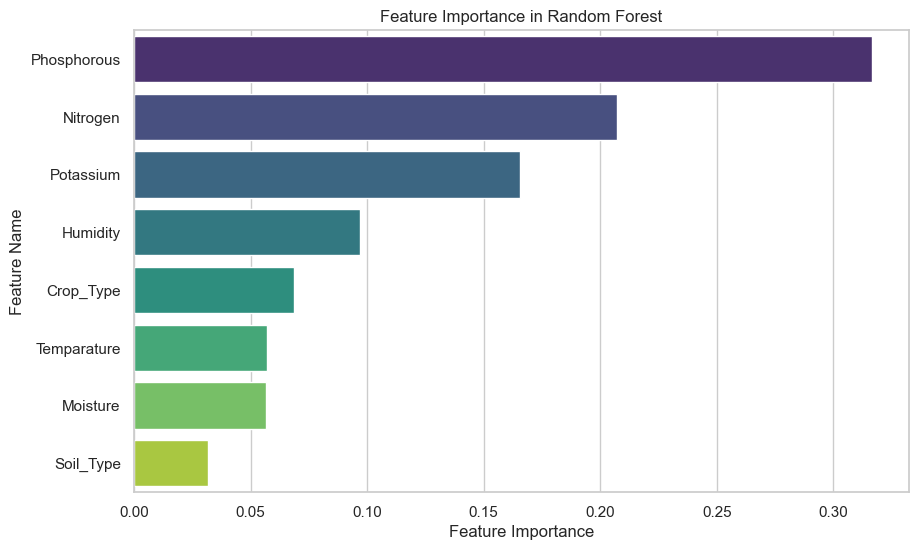

In [47]:
# Get feature importance from the model
importances = RF.feature_importances_
features = x_train.columns  # Feature names

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest")
plt.show()

### 2. Decision Trees in Random Forest (How It Makes Decisions?)

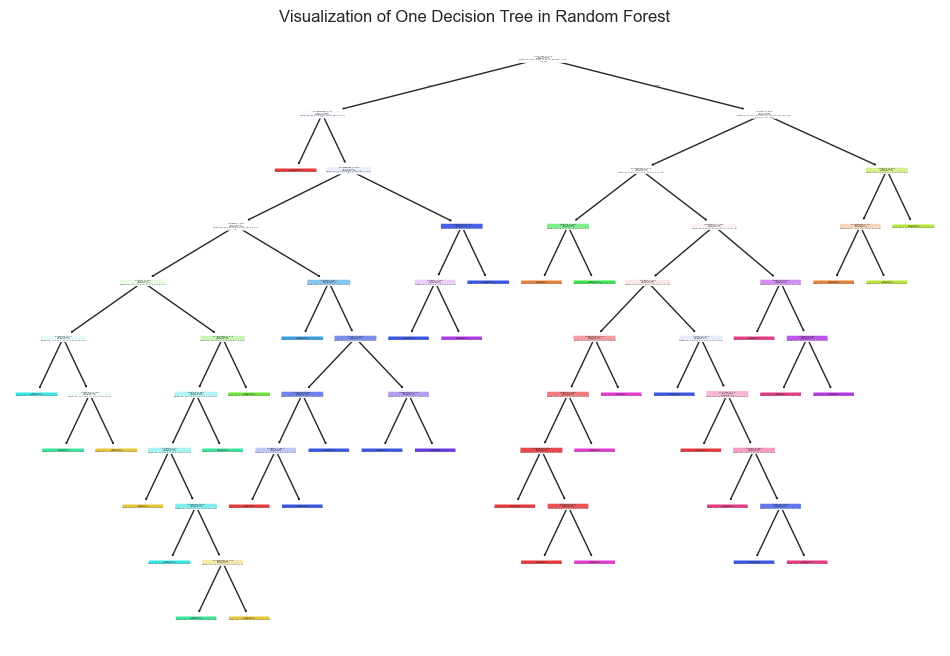

In [48]:
from sklearn.tree import plot_tree

# Select a tree from the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(RF.estimators_[0], feature_names=x_train.columns, filled=True, rounded=True)
plt.title("Visualization of One Decision Tree in Random Forest")
plt.show()

### 3. Confusion Matrix (How Well It Classifies?)

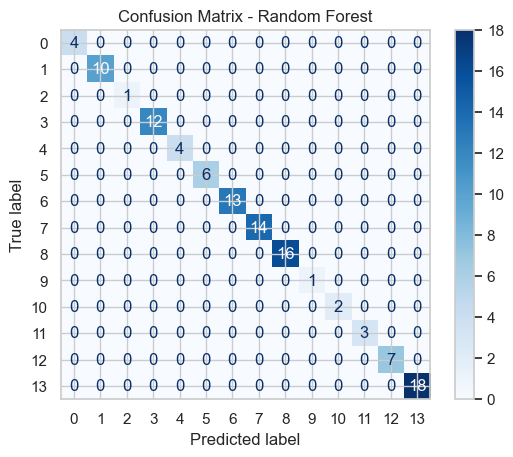

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = RF.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 4. Learning Curve (Does the Model Improve with More Data?)

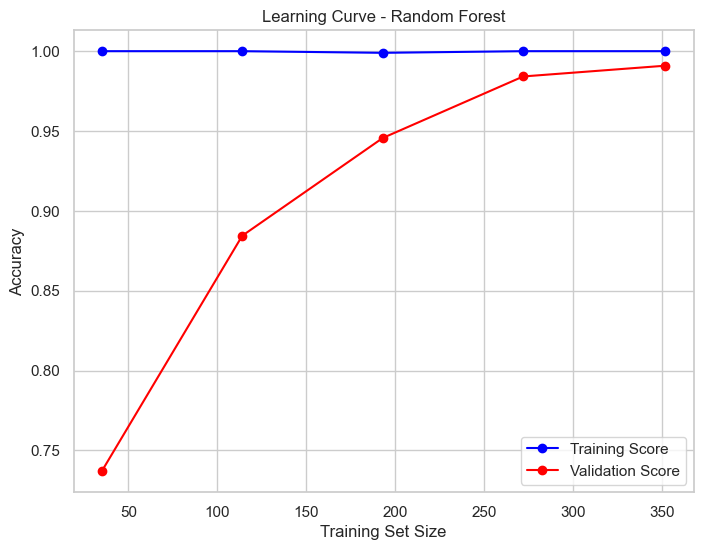

In [50]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(RF, x_train, y_train, cv=5)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score", color="red")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.show()

### 5. Decision Boundary (For 2D Data)

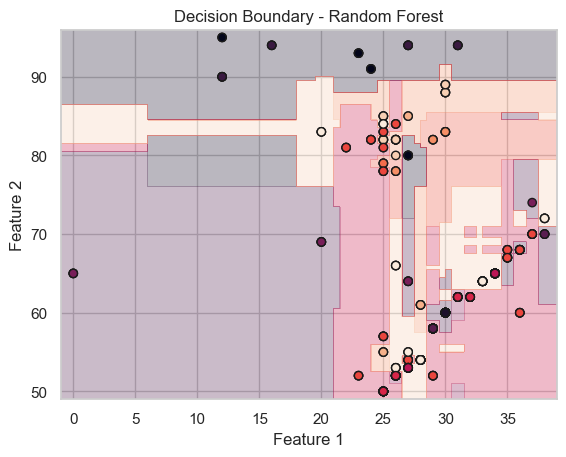

In [51]:
import numpy as np

# Select only 2 features for visualization
x_vis = x_train.iloc[:, :2]  # First two features
RF.fit(x_vis, y_train)  # Retrain model with only 2 features

# Create a mesh grid
x_min, x_max = x_vis.iloc[:, 0].min() - 1, x_vis.iloc[:, 0].max() + 1
y_min, y_max = x_vis.iloc[:, 1].min() - 1, x_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point in the mesh grid
Z = RF.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_vis.iloc[:, 0], x_vis.iloc[:, 1], c=y_train, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary - Random Forest")
plt.show()

## Cross Validation Score

In [52]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RF,data,data.Fertilizer,cv=5)
print("Cross-validation score of RF is:",score)
score = cross_val_score(LogReg,data,data.Fertilizer,cv=5)
print("Cross-validation score of LogReg is:",score)
score = cross_val_score(SVM,data,data.Fertilizer,cv=5)
print("Cross-validation score of SVM is:",score)
score = cross_val_score(NaiveBayes,data,data.Fertilizer,cv=5)
print("Cross-validation score of NaiveBayes is:",score)
score = cross_val_score(ds, data, data.Fertilizer,cv=5)
print("Cross-validation score of ds is:",score)

Cross-validation score of RF is: [1. 1. 1. 1. 1.]
Cross-validation score of LogReg is: [0.97297297 0.94594595 0.91818182 0.88181818 0.87272727]
Cross-validation score of SVM is: [0.96396396 0.92792793 0.91818182 0.88181818 0.98181818]
Cross-validation score of NaiveBayes is: [1. 1. 1. 1. 1.]
Cross-validation score of ds is: [1. 1. 1. 1. 1.]


In [53]:
print(len(acc), len(model))  # Check if they match

5 4


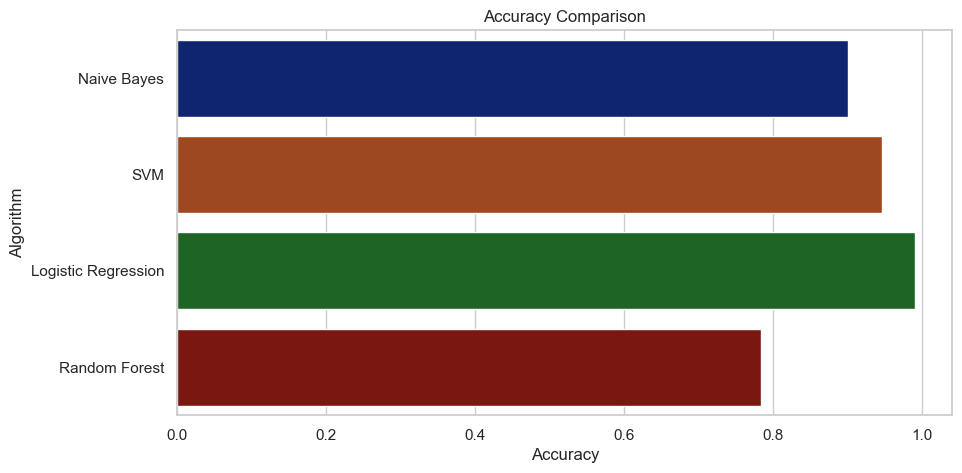

In [54]:
# Ensure equal lengths
if len(acc) > len(model):
    acc = acc[:len(model)]
elif len(model) > len(acc):
    model = model[:len(acc)]

# Now plot
plt.figure(figsize=[10,5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')

sns.barplot(x=acc, y=model, palette='dark')  # This should work now!
plt.show()

# Saving And Testing the Model Using Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Assuming X_train and y_train contain correct data
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
#pickling the file
import pickle
pickle_out = open('models/classifier.pkl','wb')
pickle.dump(rf,pickle_out)
pickle_out.close()

In [57]:
#pickling the file
import pickle
pickle_out = open('models/fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [58]:
# This shows the number of features expected by the model
print(rf.n_features_in_)  

8


In [59]:
print(x_train.shape)  # (rows, columns) -> columns should be 8

(441, 8)


In [60]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (441, 8)
x_test shape: (111, 8)


In [61]:
print("Model expects:", rf.n_features_in_)  # Should print 8

Model expects: 8


In [62]:
ferti = pickle.load(open('models/fertilizer.pkl','rb'))
ferti.classes_[1]

'10-26-26'

In [63]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [64]:
# Load the saved model
with open('models/classifier.pkl', 'rb') as file:
    model = pickle.load(file)

In [65]:
# Load the encoders used during training
encode_soil = LabelEncoder()
encode_crop = LabelEncoder()
encode_ferti = LabelEncoder()

In [66]:
# Define the original categories (ensure these match the training data)
soil_classes = ['Clayey', 'Loamy', 'Red', 'Black', 'Sandy']
crop_classes = ['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange']
fertilizer_classes = ['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10']

In [67]:
# Fit encoders with original categories
encode_soil.fit(soil_classes)
encode_crop.fit(crop_classes)
encode_ferti.fit(fertilizer_classes)

LabelEncoder()

In [68]:
# Define new test data (ensure it matches the training feature structure)
new_data = pd.DataFrame({
    "Temparature": [30],  # Example values
    "Humidity": [60],
    "Moisture": [45],
    "Soil_Type": [encode_soil.transform(["Sandy"])[0]],  # Ensure encoding is applied
    "Crop_Type": [encode_crop.transform(["Wheat"])[0]],
    "Nitrogen": [20],
    "Potassium": [15],
    "Phosphorous": [10]
})

In [69]:
x_train.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')

In [70]:
data.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer'],
      dtype='object')

In [71]:
print(rf.feature_names_in_)

['Temparature' 'Humidity' 'Moisture' 'Soil_Type' 'Crop_Type' 'Nitrogen'
 'Potassium' 'Phosphorous']


In [72]:
print(new_data.dtypes)

Temparature    int64
Humidity       int64
Moisture       int64
Soil_Type      int64
Crop_Type      int64
Nitrogen       int64
Potassium      int64
Phosphorous    int64
dtype: object


In [73]:
print(new_data.columns)

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')


In [74]:
print(new_data.head())

   Temparature  Humidity  Moisture  Soil_Type  Crop_Type  Nitrogen  Potassium  \
0           30        60        45          4         10        20         15   

   Phosphorous  
0           10  


In [75]:
new_data = new_data[['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type', 'Nitrogen', 'Potassium', 'Phosphorous']]  # Keep only required columns
prediction = rf.predict(new_data)
print("Predicted Class:", prediction)

Predicted Class: [5]


In [77]:
ferti = pickle.load(open('models/fertilizer.pkl','rb'))
ferti.classes_[5]

'17-17-17'

In [78]:
fertilizer_mapping = {
    0: "10-10-10",
    1: "10-26-26",
    2: "14-14-14",
    3: "14-35-14",
    4: "15-15-15",
    5: "17-17-17",
    6: "20-20",
    7: "28-28",
    8: "DAP",
    9: "Potassium chloride",
    10: "Potassium sulfate",
    11: "Superphosphate",
    12: "TSP",
    13: "Urea"
}

In [79]:
predicted_number = prediction[0]  # Extract the predicted number
fertilizer_name = fertilizer_mapping.get(predicted_number, "Unknown Fertilizer")

print("Recommended Fertilizer:", fertilizer_name)

Recommended Fertilizer: 17-17-17
